In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import datasets, linear_model

from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

For this notebook, we are using a dataset on student exam performance from Kaggle: https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

Save the dataset in the same directory as this notebook, and everything should run smoothly :)

In [3]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


We would expect that `Hours studied` and `Sleep Hours` would both be positively correlated with performance.

In [4]:
# Take a sample of 100 rows to keep the plots simpler
df = df.sample(n=100)

X = df[['Hours Studied', 'Sleep Hours']]
y = df['Performance Index']

In [5]:
mmodel = linear_model.LinearRegression()
mmodel.fit(X, y)

LinearRegression()

In [6]:
# Get the coefficients and intercept
beta_0 = mmodel.intercept_
beta_1, beta_2 = mmodel.coef_

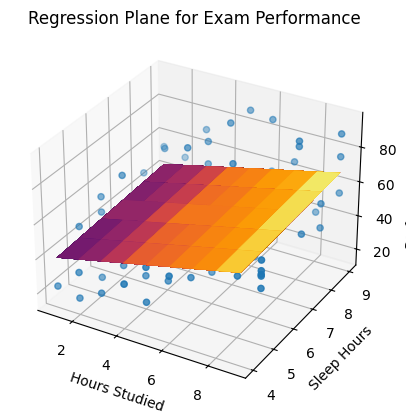

In [7]:
# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the independent variables
x = df['Hours Studied']
y = df['Sleep Hours']
z = df['Performance Index']

# Add the data points
ax.scatter(x, y, z)

# Fit the regression plane
A = np.vstack([x, y, np.ones_like(x)]).T
plane_coef, _, _, _ = np.linalg.lstsq(A, z, rcond=None)

# Create a meshgrid for the plane
x_plane, y_plane = np.meshgrid(x, y)
z_plane = plane_coef[0] * x_plane + plane_coef[1] * y_plane + plane_coef[2]

# Plot the regression plane
ax.plot_surface(x_plane, y_plane, z_plane, cmap='inferno')

# Labels and title
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Sleep Hours')
ax.set_zlabel('Performance Index')
plt.title('Regression Plane for Exam Performance')

# Show the plot
plt.show()

And now for the interactive plot:

In [8]:
# Create a grid of x1, x2 values for plotting the surface
x1 = df['Hours Studied'].values
x2 = df['Sleep Hours'].values
x1_grid, x2_grid = np.meshgrid(x1, x2)
X_grid = np.vstack([x1_grid.ravel(), x2_grid.ravel()]).T

# Predict the corresponding y values for the grid
y_pred_grid = mmodel.predict(X_grid).reshape(x1_grid.shape)

# Create an interactive 3D surface plot using plotly
fig = go.Figure(data=[go.Surface(z=y_pred_grid, x=x1_grid, y=x2_grid, colorscale='inferno', opacity=0.7)])

# Add data points to the plot
fig.add_trace(go.Scatter3d(x=x1.flatten(), y=x2.flatten(), z=df['Performance Index'].values.flatten(), mode='markers', 
                           marker=dict(color='blue', size=5, opacity=0.5), name='Data Points'))

# Set axis labels
fig.update_layout(
    scene=dict(
        xaxis_title='x1',
        yaxis_title='x2',
        zaxis_title='y',
    ),
    title='Regression Plane for Exam Performance',
)

# Show the interactive plot
fig.show()

c:\Users\AmeSaleem\Environments\test\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Over to you! Have a play around with the other fields. You can even try building a regression model using *all* the columns in the dataset. [Hint: the code for the model is almost identical, you'll just need to change the variable `X`].